# Course-End Project: Creating Cohorts of Songs

In [1]:
## Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data preprocessing and Visualisation

In [2]:
## read the data
df = pd.read_excel("1673873388_rolling_stones_spotify.xlsx")
df.head(7)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106
5,5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,3ixZ1NQk5sqvBZgWeIdiqr,spotify:track:3ixZ1NQk5sqvBZgWeIdiqr,0.2750,0.340,0.956,0.125000,0.741,-5.539,0.0915,101.628,0.1250,31,244293
6,6,Angie - Live,Licked Live In NYC,2022-06-10,7,3R1Vq1RS6mWNSD2oni6jNf,spotify:track:3R1Vq1RS6mWNSD2oni6jNf,0.5610,0.262,0.810,0.000003,0.972,-6.851,0.0969,77.520,0.3940,31,245506


In [3]:
df.tail()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680
1609,1609,Walking The Dog,The Rolling Stones,1964-04-16,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.969,35,189186


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1610.0,804.500000,464.911282,0.000000,402.250000,804.50000,1206.75000,1609.000
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304


In [5]:
df.shape  ## 1610 rows and 18 columns

(1610, 18)

In [6]:
df.size

28980

In [7]:
df[df.duplicated()]   ## There is no duplicate row

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms


In [8]:
df.isnull().sum()    ## There are no missing values

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [9]:
df[["duration_ms"]]  = df[["duration_ms"]] / 1000   ## converting mili seconds to seconds

In [10]:
df.drop(["Unnamed: 0","id","uri"],axis = 1,inplace = True)  ## dropping irrelevant columns

In [11]:
columns = df.columns
columns

Index(['name', 'album', 'release_date', 'track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

<Axes: >

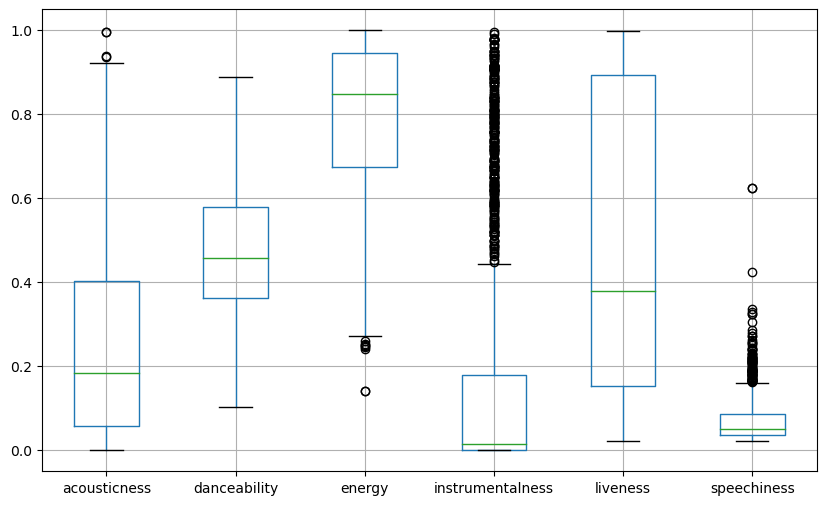

In [13]:
# checking for outliers
plt.figure(figsize=(10,6))
df.boxplot(column=['acousticness','danceability','energy','instrumentalness','liveness',"speechiness"]) 

<Axes: >

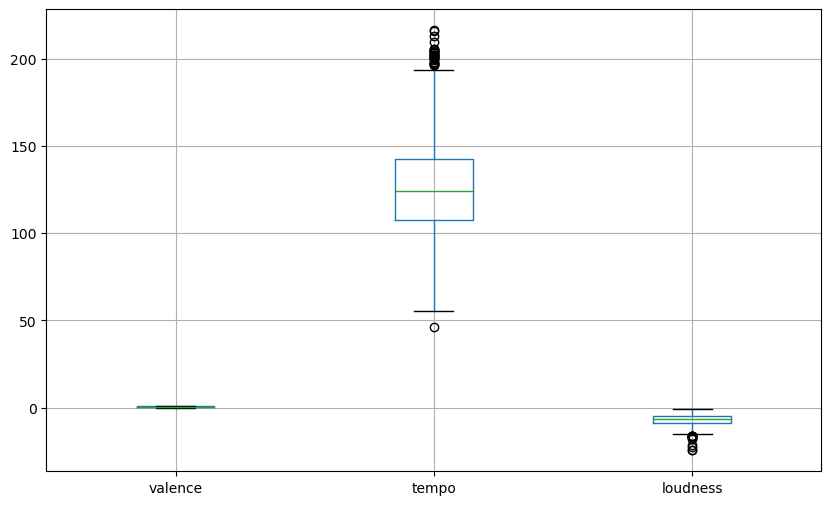

In [14]:
# checking for outliers
plt.figure(figsize=(10,6))
df.boxplot(column=['valence',"tempo","loudness"]) 

In [15]:
## Columns having outliers : 'acousticness' , 'energy','instrumentalness' , "speechiness" , "tempo","loudness"

In [16]:
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in ['acousticness' , 'energy','instrumentalness' , "speechiness" , "tempo","loudness"]:
    outliers = detect_outliers_iqr(df[i])
    print("number of Outliers in",i,"attribute :", len(outliers))

number of Outliers in acousticness attribute : 4
number of Outliers in energy attribute : 8
number of Outliers in instrumentalness attribute : 272
number of Outliers in speechiness attribute : 92
number of Outliers in tempo attribute : 34
number of Outliers in loudness attribute : 14


In [17]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['acousticness','energy','speechiness','tempo','loudness']:
    df[i]=handle_outliers(df[i])

<Axes: >

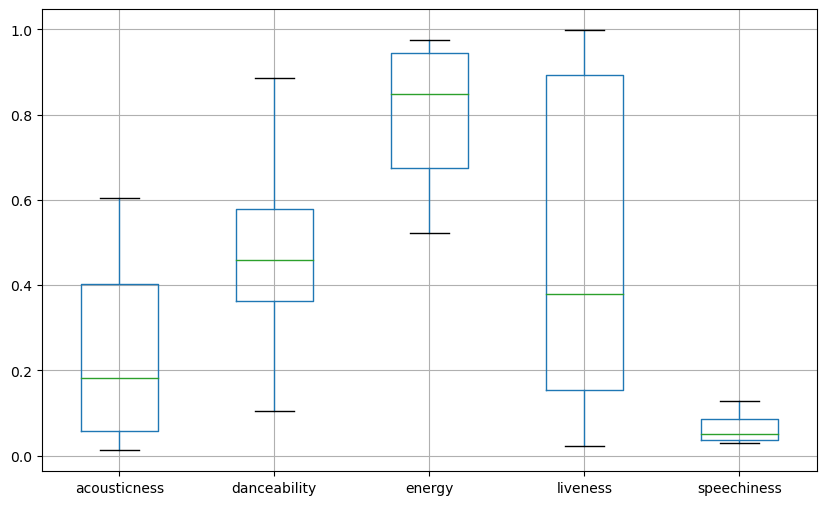

In [18]:
# checking for outliers
plt.figure(figsize=(10,6))
df.boxplot(column=['acousticness','danceability','energy','liveness',"speechiness"]) 

<Axes: >

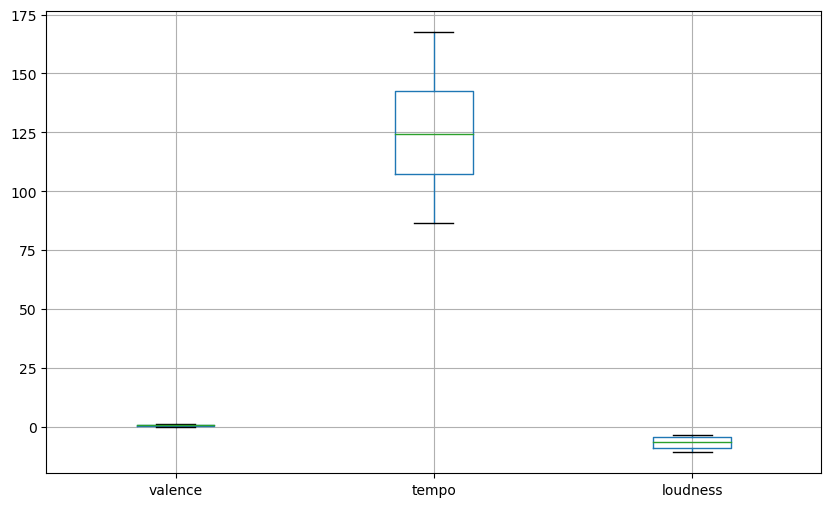

In [19]:
# checking for outliers
plt.figure(figsize=(10,6))
df.boxplot(column=['valence',"tempo","loudness"]) 

In [20]:
data = df[["instrumentalness"]]
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

IQR = q3-q1
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)

df["instrumentalness"] = np.where(
    df["instrumentalness"] > upper_limit,
    upper_limit,
    np.where(
        df["instrumentalness"] < lower_limit,
        lower_limit,
        df["instrumentalness"]
    )
)

<Axes: >

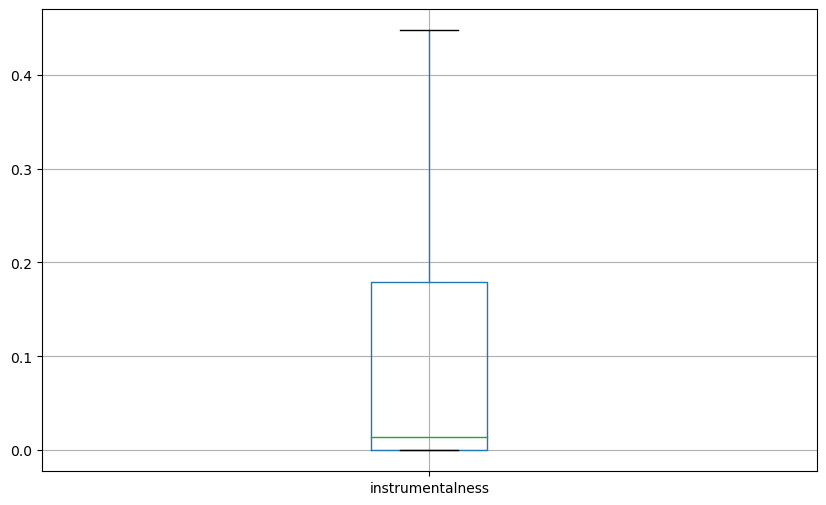

In [21]:
# checking for outliers
plt.figure(figsize=(10,6))
df.boxplot(column=["instrumentalness"]) 

In [22]:
columns

Index(['name', 'album', 'release_date', 'track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')

album
12 X 5                              32.083333
12 x 5                               5.000000
A Bigger Bang (2009 Re-Mastered)    27.062500
A Bigger Bang (Live)                18.181818
Aftermath                           43.090909
                                      ...    
Undercover                          18.000000
Undercover (2009 Re-Mastered)       25.100000
Voodoo Lounge (Remastered 2009)     34.000000
Voodoo Lounge Uncut (Live)          11.678571
got LIVE if you want it!            15.333333
Name: popularity, Length: 90, dtype: float64


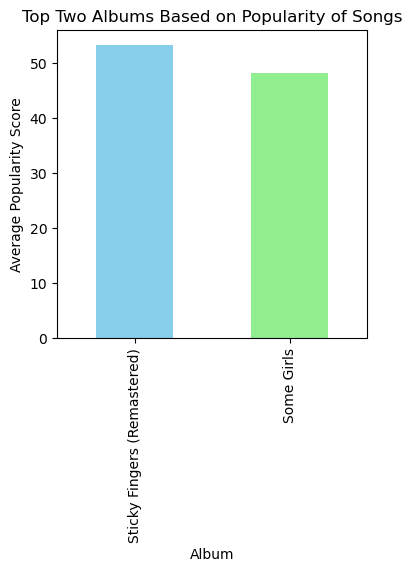

In [23]:
# Group by album and calculate average popularity
album_popularity = df.groupby('album')['popularity'].mean()

print(album_popularity)

# Sort albums by popularity
sorted_albums = album_popularity.sort_values(ascending=False)

# Select the top two albums
top_two_albums = sorted_albums.head(2)

# Create a bar chart
plt.figure(figsize=(4, 4))
top_two_albums.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Top Two Albums Based on Popularity of Songs')
plt.xlabel('Album')
plt.ylabel('Average Popularity Score')
plt.show()

In [24]:
# df.groupby('album').sum()
# df.groupby('album').mean()   # it actually grouping the dataframe with respect to "album" and gives the mean of all data points of all the numeric columns
# df.groupby('album')["popularity"].mean()  # it actually grouping the dataframe with respect to "album" and gives the mean of all data points of the column

## Distribution plots

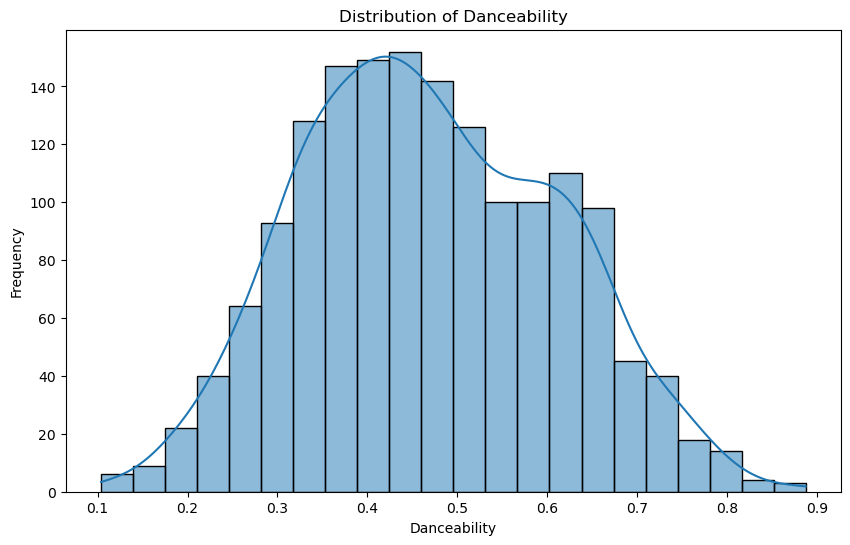

In [25]:
# Example: Distribution of 'danceability'
plt.figure(figsize=(10, 6))
sns.histplot(df['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

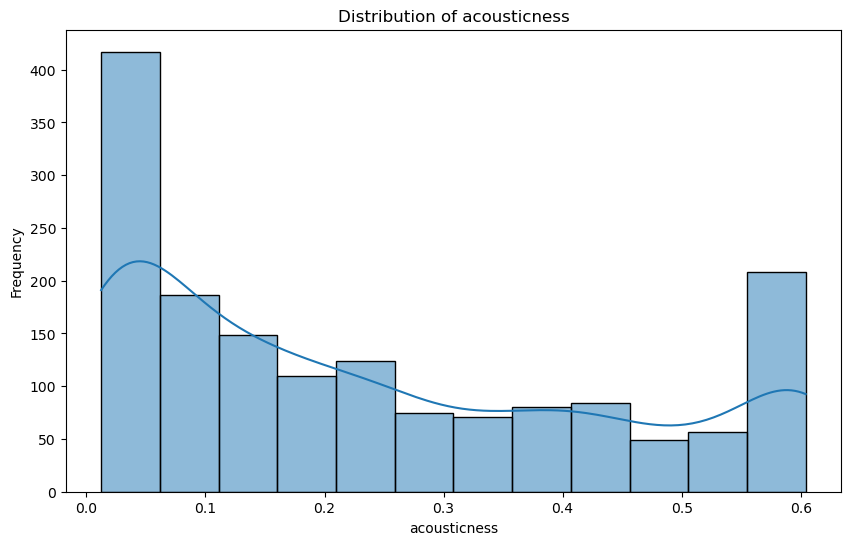

In [26]:
#acousticness
plt.figure(figsize=(10, 6))
sns.histplot(df['acousticness'], kde=True)
plt.title('Distribution of acousticness')
plt.xlabel('acousticness')
plt.ylabel('Frequency')
plt.show()


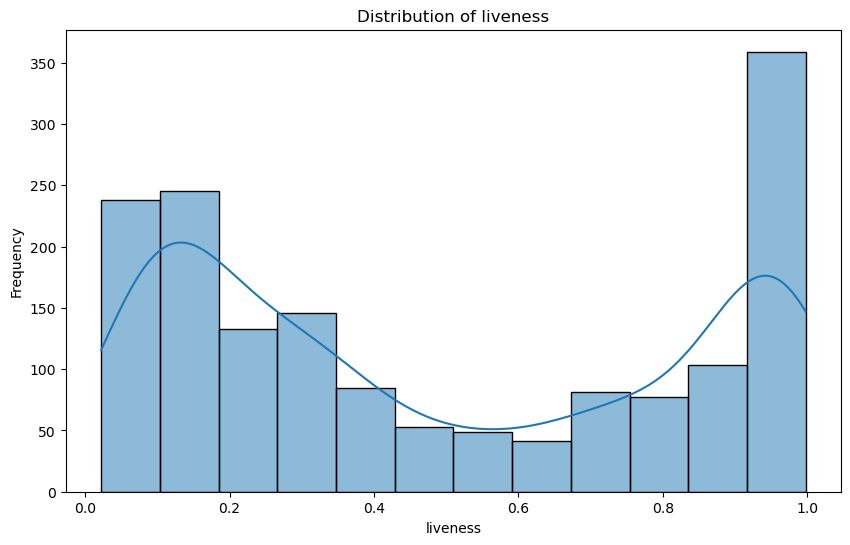

In [27]:
# liveness

#acousticness
plt.figure(figsize=(10, 6))
sns.histplot(df['liveness'], kde=True)
plt.title('Distribution of liveness')
plt.xlabel('liveness')
plt.ylabel('Frequency')
plt.show()

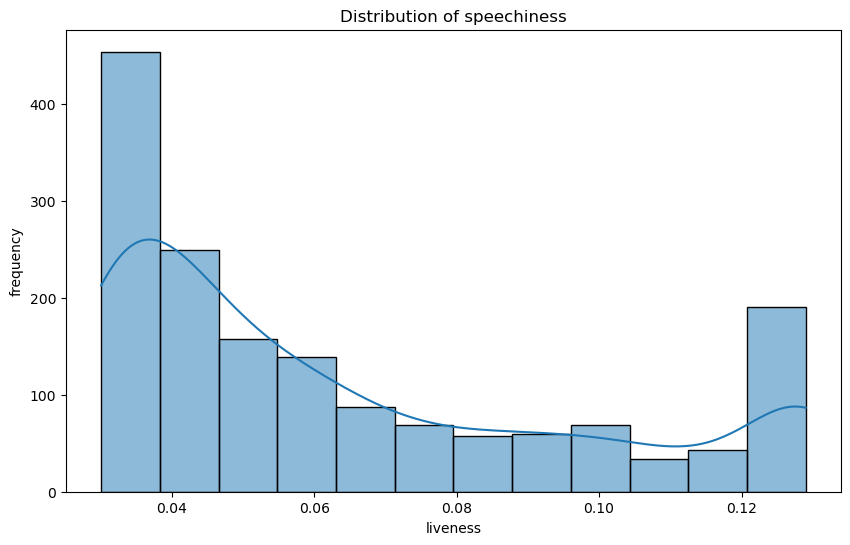

In [28]:
# speechiness

plt.figure(figsize=(10, 6))
sns.histplot(df['speechiness'], kde=True)
plt.title('Distribution of speechiness')
plt.xlabel('liveness')
plt.ylabel('frequency')
plt.show()

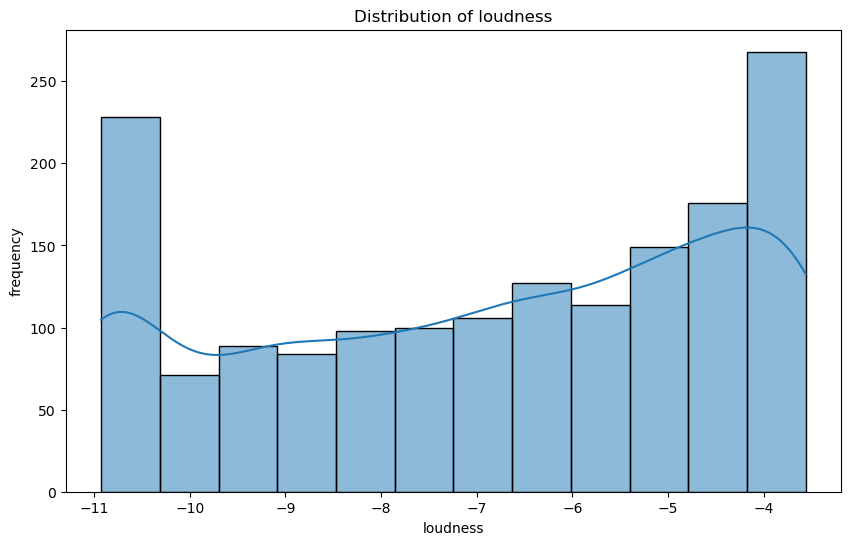

In [29]:
#loudness

plt.figure(figsize=(10, 6))
sns.histplot(df['loudness'], kde=True)
plt.title('Distribution of loudness')
plt.xlabel('loudness')
plt.ylabel('frequency')
plt.show()


## Correlation analysis

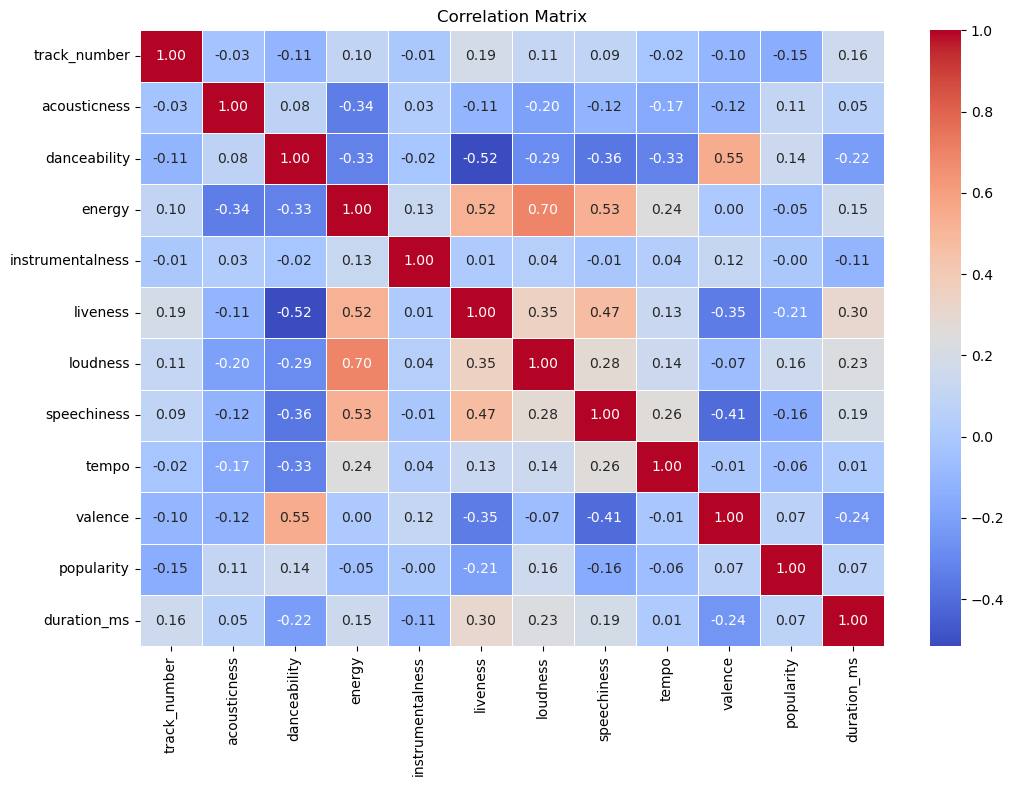

In [30]:
correlation_matrix = df.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Relationships

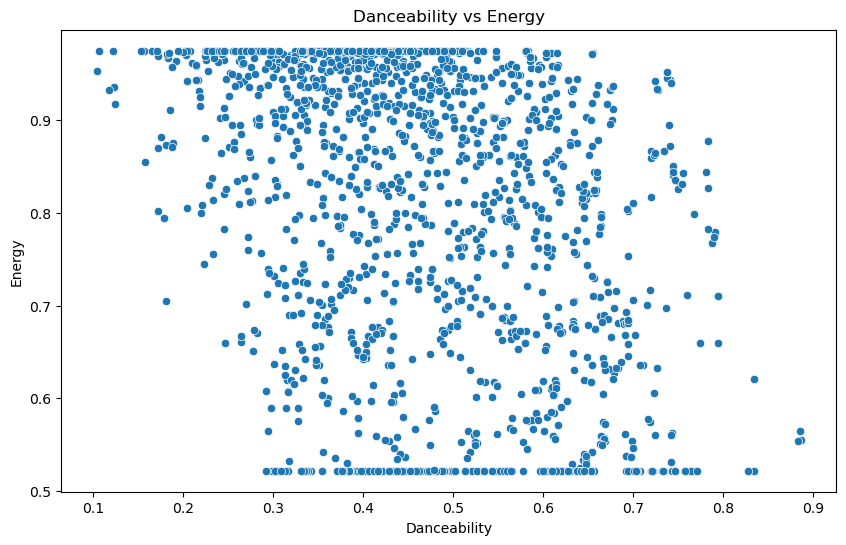

In [31]:
# Example: Scatter plot of 'danceability' vs 'energy'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

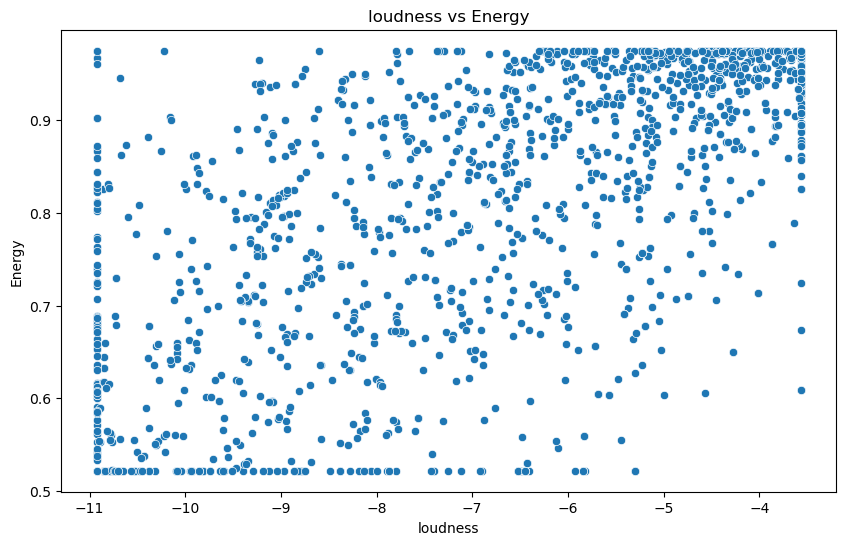

In [32]:
# Example: Scatter plot of 'danceability' vs 'energy'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='energy', data=df)
plt.title('loudness vs Energy')
plt.xlabel('loudness')
plt.ylabel('Energy')
plt.show()

## Time Series Analysis

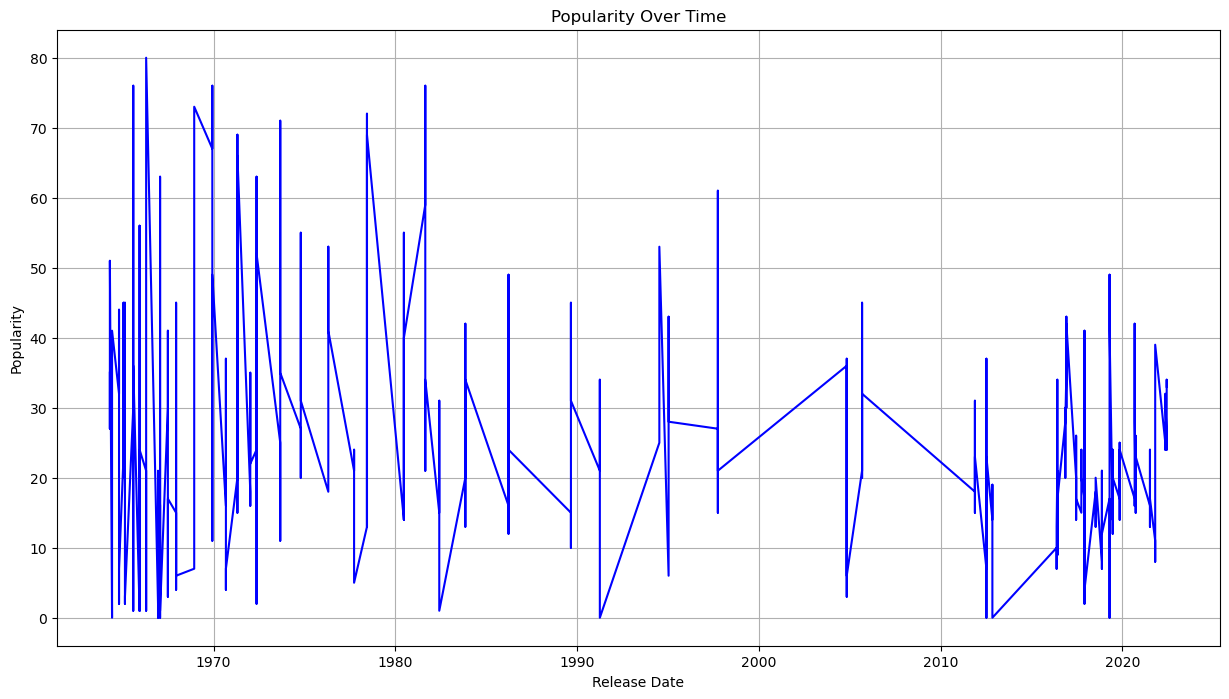

In [33]:
plt.figure(figsize=(15, 8))
plt.plot(df['release_date'], df['popularity'], linestyle='-', color='b')
plt.title('Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [34]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.975,0.447171,0.932,-10.926,0.1100,118.001,0.0302,33,48.640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253.173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263.160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.975,0.000107,0.895,-5.535,0.1290,132.994,0.1470,32,305.880
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305.106


## Relation of popularity with respect to various factors

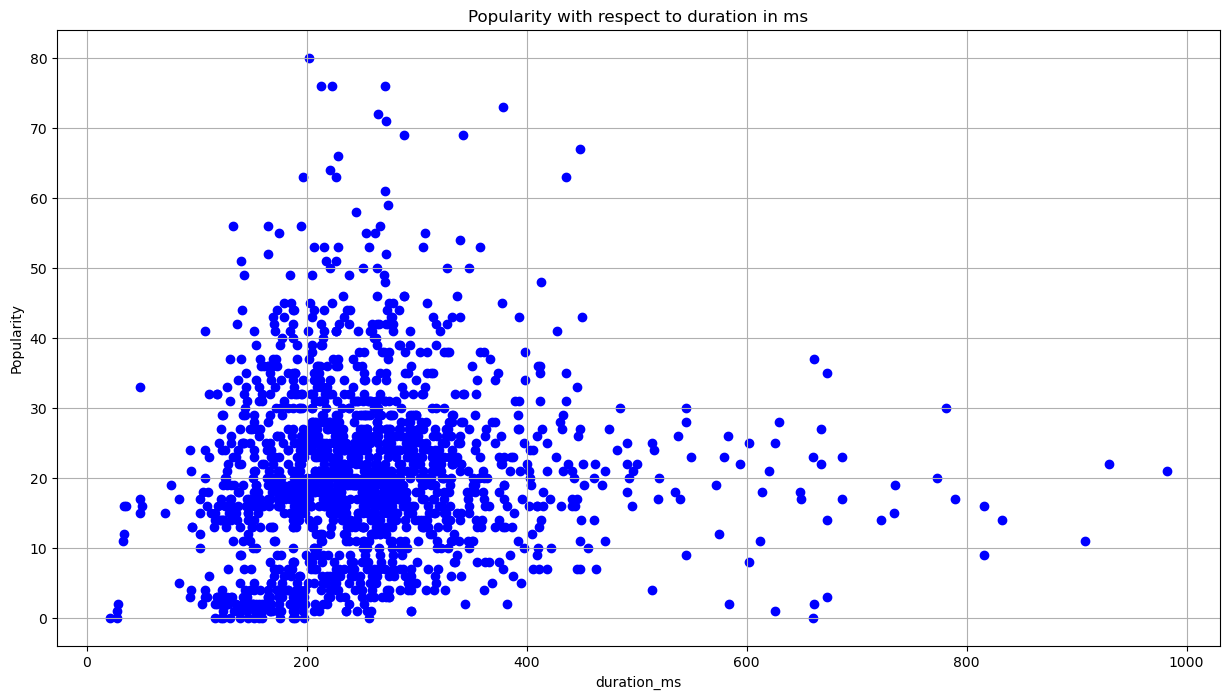

In [35]:
## With duration
plt.figure(figsize=(15, 8))
plt.scatter(df['duration_ms'], df['popularity'], color='b')
plt.title('Popularity with respect to duration in ms')
plt.xlabel('duration_ms')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

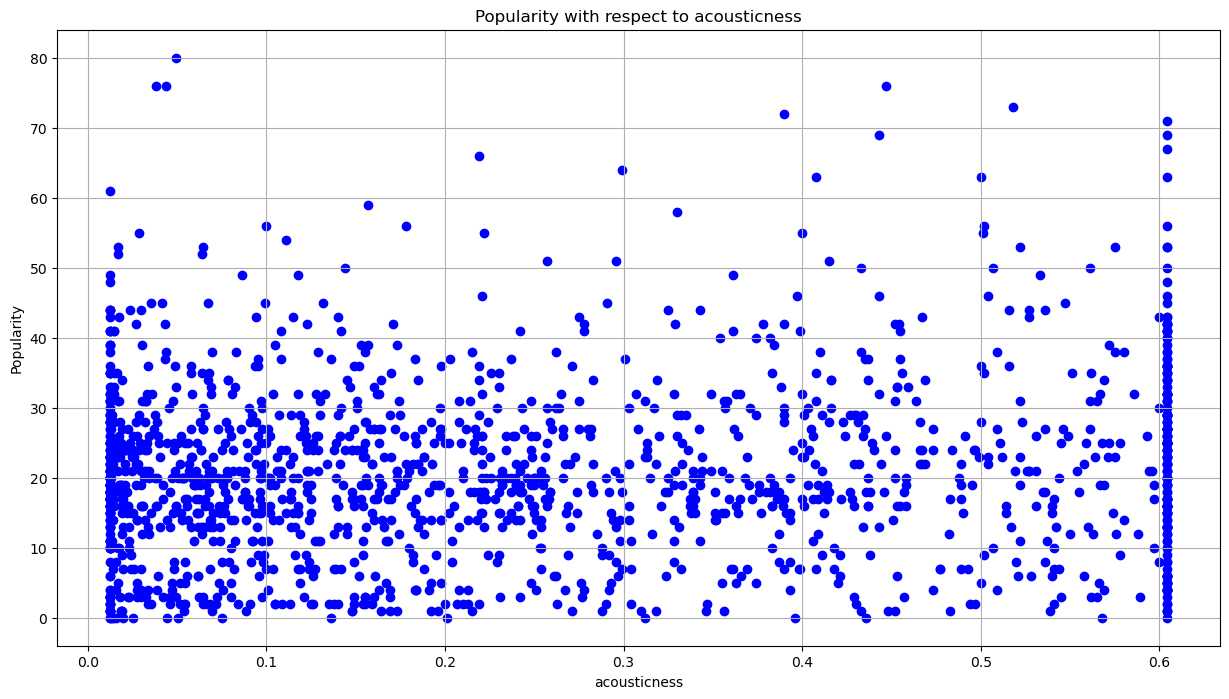

In [36]:
## With duration
plt.figure(figsize=(15, 8))
plt.scatter(df['acousticness'], df['popularity'], color='b')
plt.title('Popularity with respect to acousticness')
plt.xlabel('acousticness')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

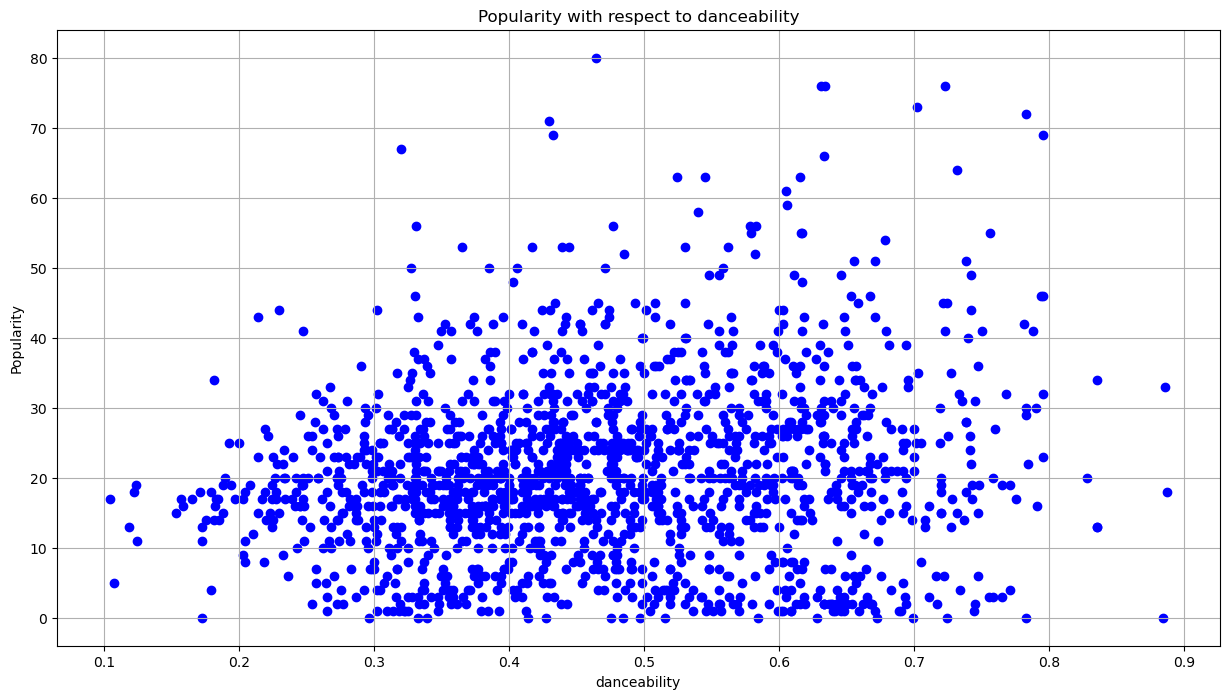

In [37]:
## With danceability
plt.figure(figsize=(15, 8))
plt.scatter(df['danceability'], df['popularity'], color='b')
plt.title('Popularity with respect to danceability')
plt.xlabel('danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

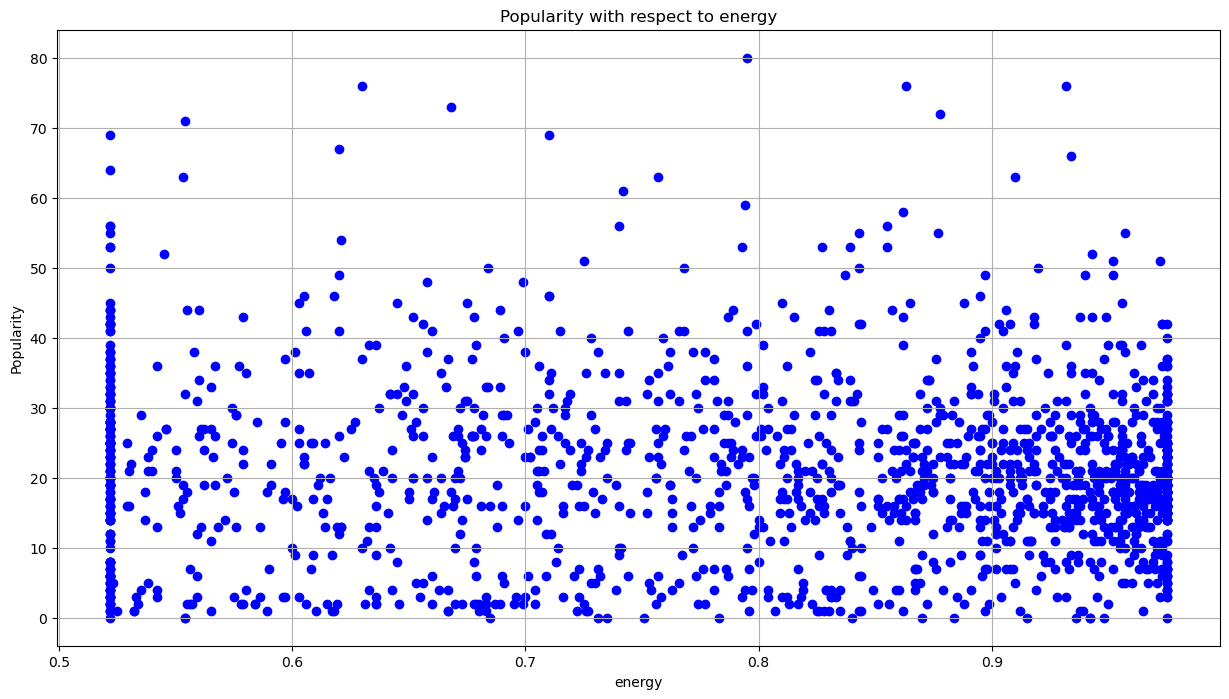

In [38]:
## With energy
plt.figure(figsize=(15, 8))
plt.scatter(df['energy'], df['popularity'], color='b')
plt.title('Popularity with respect to energy')
plt.xlabel('energy')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

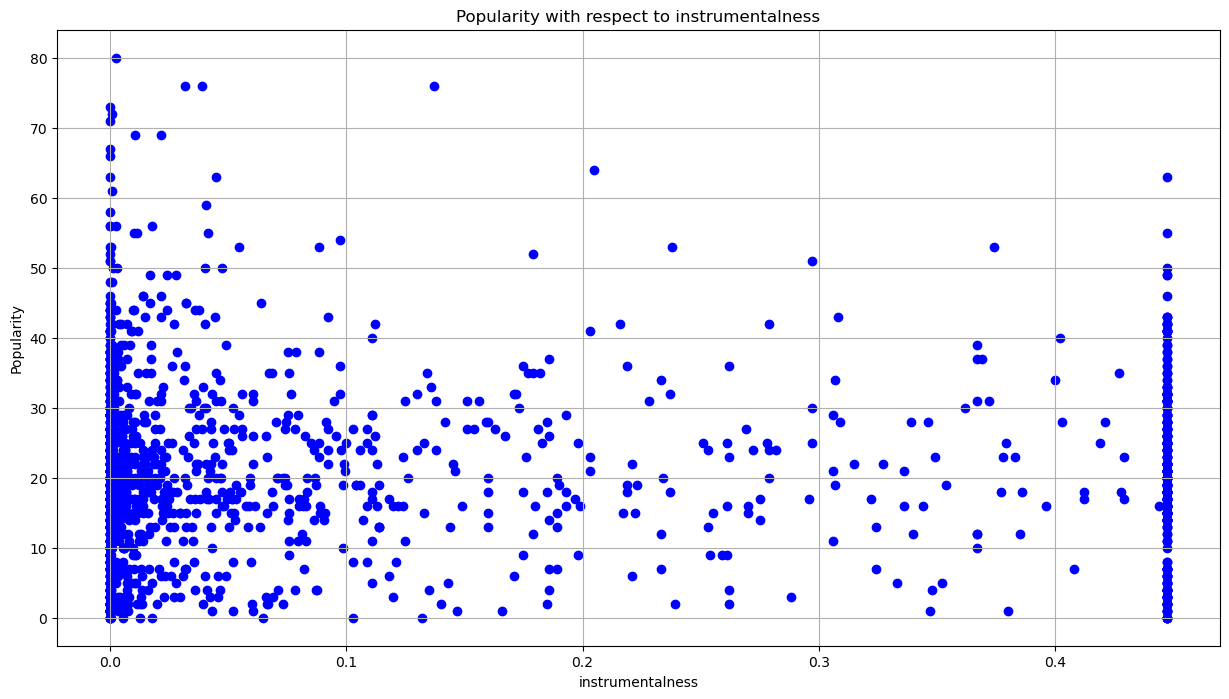

In [39]:
## With instrumentalness
plt.figure(figsize=(15, 8))
plt.scatter(df['instrumentalness'], df['popularity'], color='b')
plt.title('Popularity with respect to instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [40]:
#instrumentalness	liveness	loudness	speechiness	tempo	valence

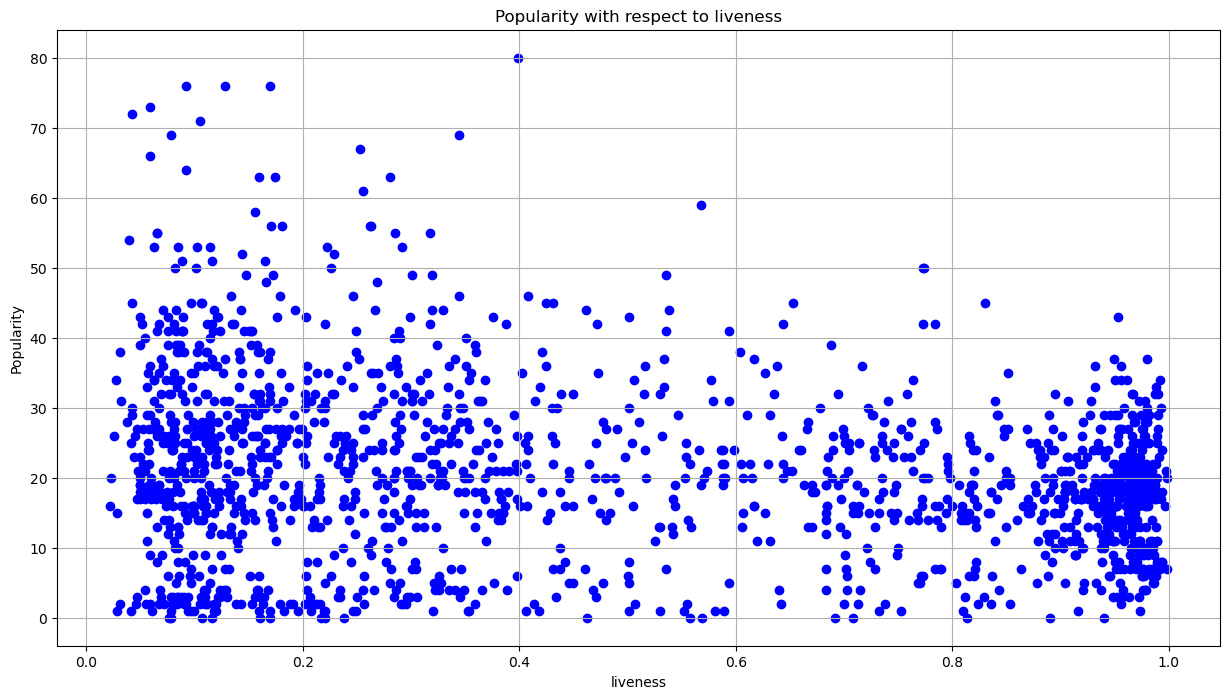

In [41]:
## With liveness
plt.figure(figsize=(15, 8))
plt.scatter(df['liveness'], df['popularity'], color='b')
plt.title('Popularity with respect to liveness')
plt.xlabel('liveness')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

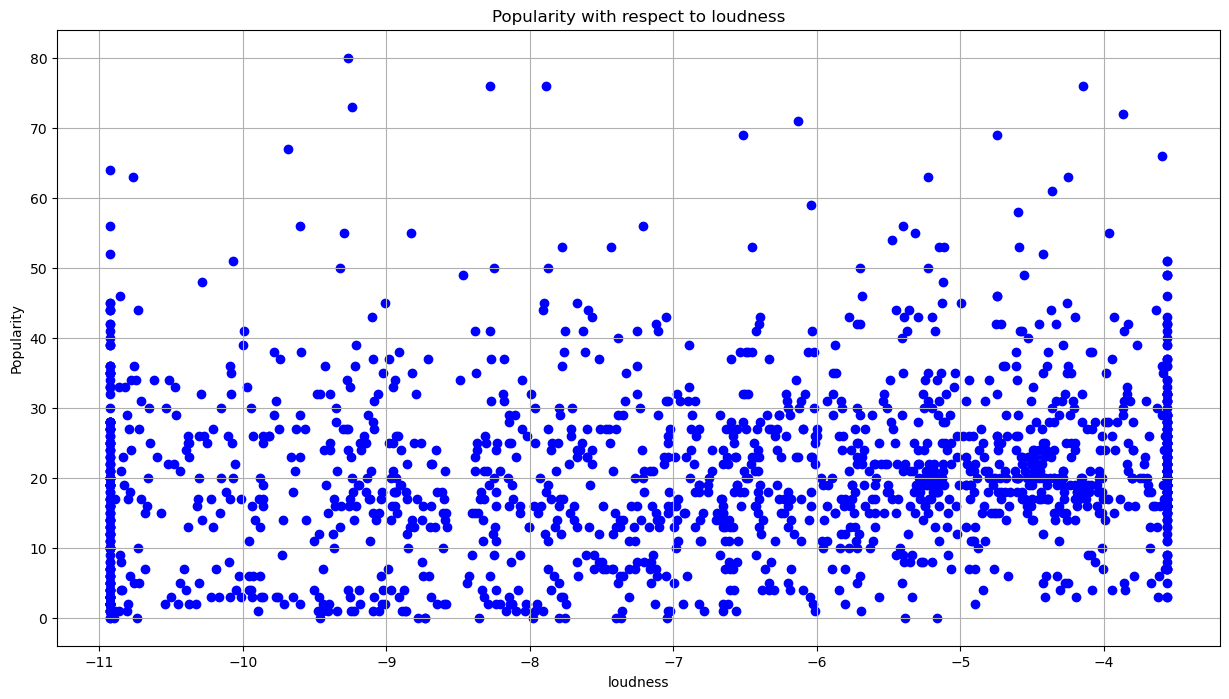

In [42]:
## With loudness
plt.figure(figsize=(15, 8))
plt.scatter(df['loudness'], df['popularity'], color='b')
plt.title('Popularity with respect to loudness')
plt.xlabel('loudness')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

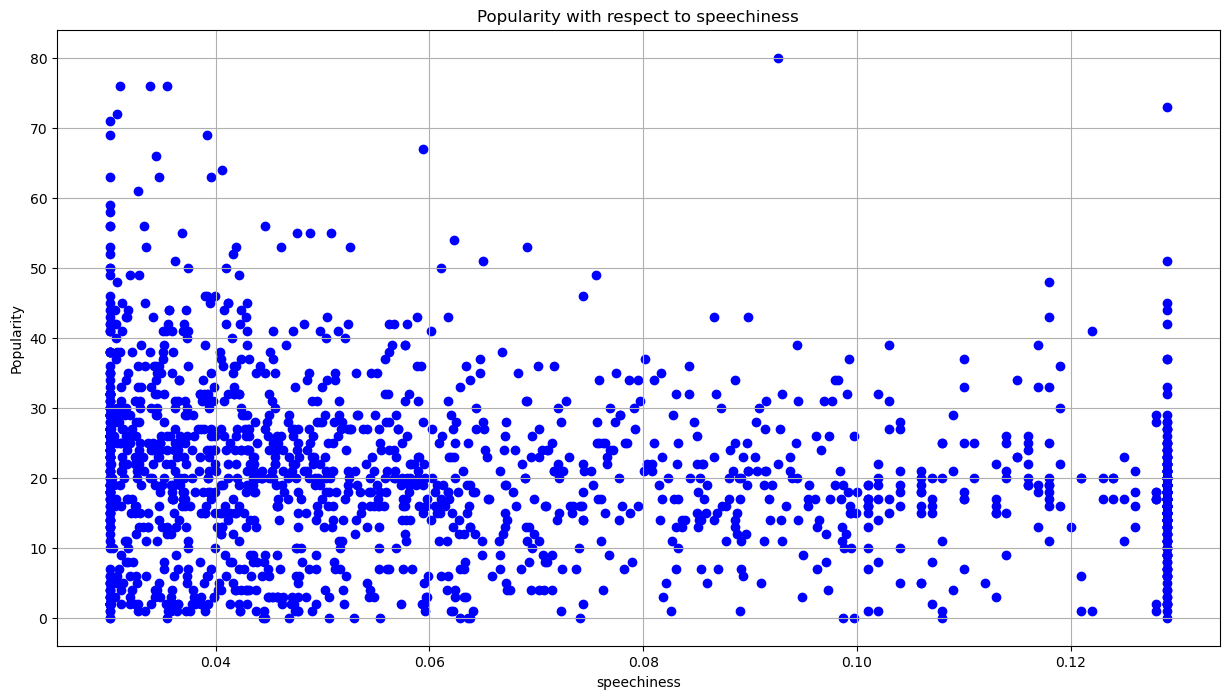

In [43]:
## With speechiness
plt.figure(figsize=(15, 8))
plt.scatter(df['speechiness'], df['popularity'], color='b')
plt.title('Popularity with respect to speechiness')
plt.xlabel('speechiness')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

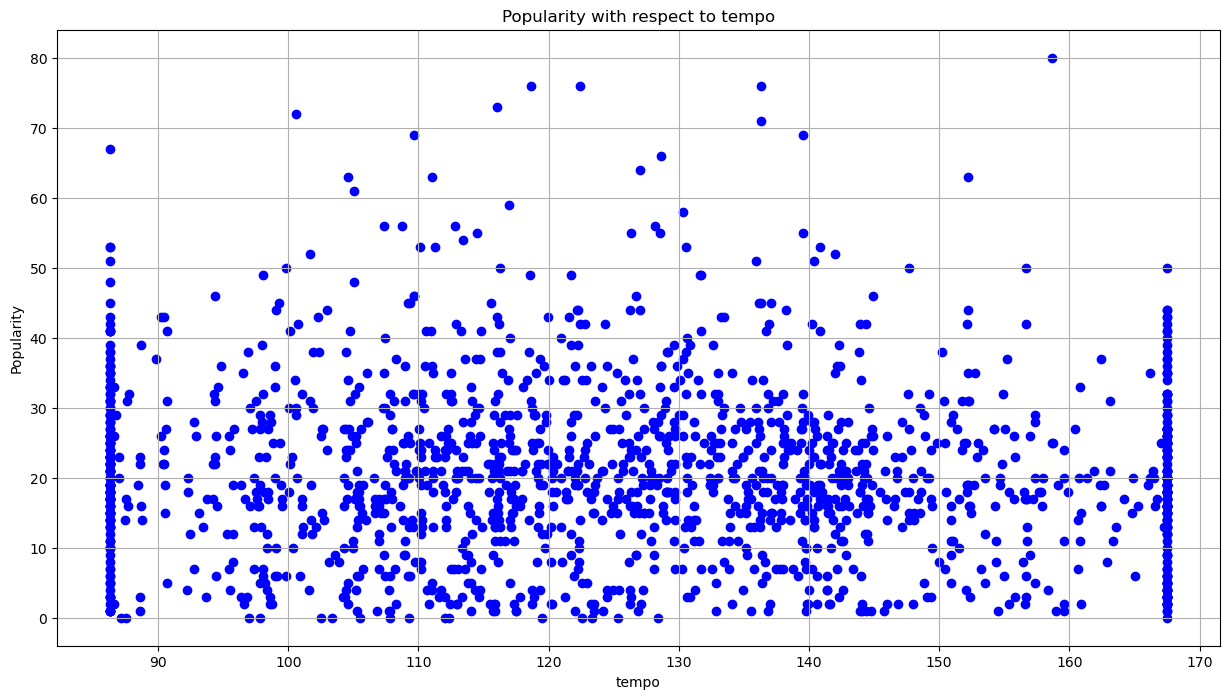

In [44]:
## With tempo
plt.figure(figsize=(15, 8))
plt.scatter(df['tempo'], df['popularity'], color='b')
plt.title('Popularity with respect to tempo')
plt.xlabel('tempo')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'your_column' is the column with various classes in your DataFrame
le = LabelEncoder()
df['album'] = le.fit_transform(df['album'])

## Performing Clustering Analysis

In [46]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,47,2022-06-10,1,0.0824,0.463,0.975,0.447171,0.932,-10.926,0.1100,118.001,0.0302,33,48.640
1,Street Fighting Man - Live,47,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253.173
2,Start Me Up - Live,47,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263.160
3,If You Can't Rock Me - Live,47,2022-06-10,4,0.5670,0.369,0.975,0.000107,0.895,-5.535,0.1290,132.994,0.1470,32,305.880
4,Donâ€™t Stop - Live,47,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305.106


In [47]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['day'] = df['release_date'].dt.day

In [48]:
from sklearn.preprocessing import StandardScaler

# Select the features you want to use for clustering
features = df[['year', 'month', 'day']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [49]:
df.drop(["name","release_date"],axis = 1,inplace = True)

In [50]:
df.head()

,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year,month,day
0,47,1,0.0824,0.463,0.975,0.447171,0.932,-10.926,0.1100,118.001,0.0302,33,48.640,2022,6,10
1,47,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253.173,2022,6,10
2,47,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263.160,2022,6,10
3,47,4,0.5670,0.369,0.975,0.000107,0.895,-5.535,0.1290,132.994,0.1470,32,305.880,2022,6,10
4,47,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305.106,2022,6,10


In [51]:
## import and apply K means clustering 

from sklearn.cluster import KMeans

wcss=[]      #within a cluster sum of square (c-xi)2   

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1) #Start with same random data point as centroid ,random_state=1
    kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)  #the distance between each data point and its centroid, squaring this distance, and summing these squares acro

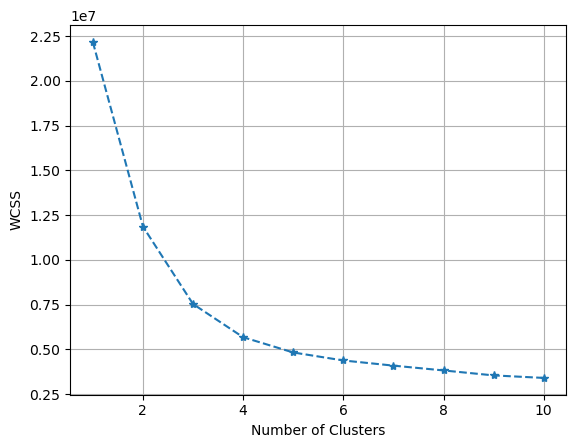

In [52]:

# Elbow method
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()